# Introduction

For this assignment I will be using a dataset called the "Higher Education Students Performance Evaluation" found from the UC Irvine Machine Learning Repositiory. The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019 and contains studnet responses on personal, family and educational habit questions. Within the data there are 145 observations of individual students and a multitude of variables including course ID and output grade.

I choose this data out of curiosity of the important predictor variables for academic success. Knowing which variables are potentially important will help me to best set-up my future child, if I have any, and I am also curious to see if my own circumstances reflect a high or low performing student.

This data was found at the URL:

https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation

# Data Exploration

In [140]:
# Importing the data 

import pandas as pd
df = pd.read_csv("educationalperformance.csv")

# Displaying the first few rows of the dataframe
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [141]:
# Checkign for missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

The dataframe contains no null values, and all data is formatted as integers representing different set responses. I note here that the data type for the student ID column is object as well in the data wrangling section I will convert this to int and parse out the student ID number.

In [142]:
# Summary statistics of the dataset (mean, median, std, quartiles)
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


# Data Wrangling

In [143]:
# First converting the Student ID to int by removing the "Student" prefix
df['STUDENT ID'] = df['STUDENT ID'].str.replace('STUDENT', '').astype(int)

# Now we can check the data types of the columns
df.dtypes

STUDENT ID    int64
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
7             int64
8             int64
9             int64
10            int64
11            int64
12            int64
13            int64
14            int64
15            int64
16            int64
17            int64
18            int64
19            int64
20            int64
21            int64
22            int64
23            int64
24            int64
25            int64
26            int64
27            int64
28            int64
29            int64
30            int64
COURSE ID     int64
GRADE         int64
dtype: object

In [144]:
# Checking if the Student ID column is now only the ID numbers
df['STUDENT ID'].head()

0    1
1    2
2    3
3    4
4    5
Name: STUDENT ID, dtype: int64

In [145]:
# Adding descriptive column headers to the data
df.columns = [
    "student_id", "student_age", "sex", "high_school_type", "scholarship_type",
    "additional_work", "regular_artistic_or_sports_activity", "has_partner", "total_salary",
    "transportation_to_uni", "living_accommodation_type", "mother_education", "father_education",
    "siblings_count", "parental_status", "mother_occupation", "father_occupation",
    "weekly_study_hours", "reading_freq_non_sci", "reading_freq_sci", "seminar_attendance",
    "projects_impact_on_success", "class_attendance", "midterm_prep_1", "midterm_prep_2",
    "note_taking", "class_listening", "discussion_effect", "flip_classroom",
    "cumulative_gpa_last_semester", "expected_cumulative_gpa", "course_id", "output_grade"
]

# Viewing new column names.
print(df.columns)

Index(['student_id', 'student_age', 'sex', 'high_school_type',
       'scholarship_type', 'additional_work',
       'regular_artistic_or_sports_activity', 'has_partner', 'total_salary',
       'transportation_to_uni', 'living_accommodation_type',
       'mother_education', 'father_education', 'siblings_count',
       'parental_status', 'mother_occupation', 'father_occupation',
       'weekly_study_hours', 'reading_freq_non_sci', 'reading_freq_sci',
       'seminar_attendance', 'projects_impact_on_success', 'class_attendance',
       'midterm_prep_1', 'midterm_prep_2', 'note_taking', 'class_listening',
       'discussion_effect', 'flip_classroom', 'cumulative_gpa_last_semester',
       'expected_cumulative_gpa', 'course_id', 'output_grade'],
      dtype='object')


In [146]:
# Dropping midterm prep columns, projects impact on success, discussion effect, and flip classroom columns
df = df.drop(columns=[
    "midterm_prep_1", "midterm_prep_2", "projects_impact_on_success",
    "discussion_effect", "flip_classroom","seminar_attendance"
])

# Visualizations (Matplotlib)

#### Barplot of student action predictors grouped by output grade

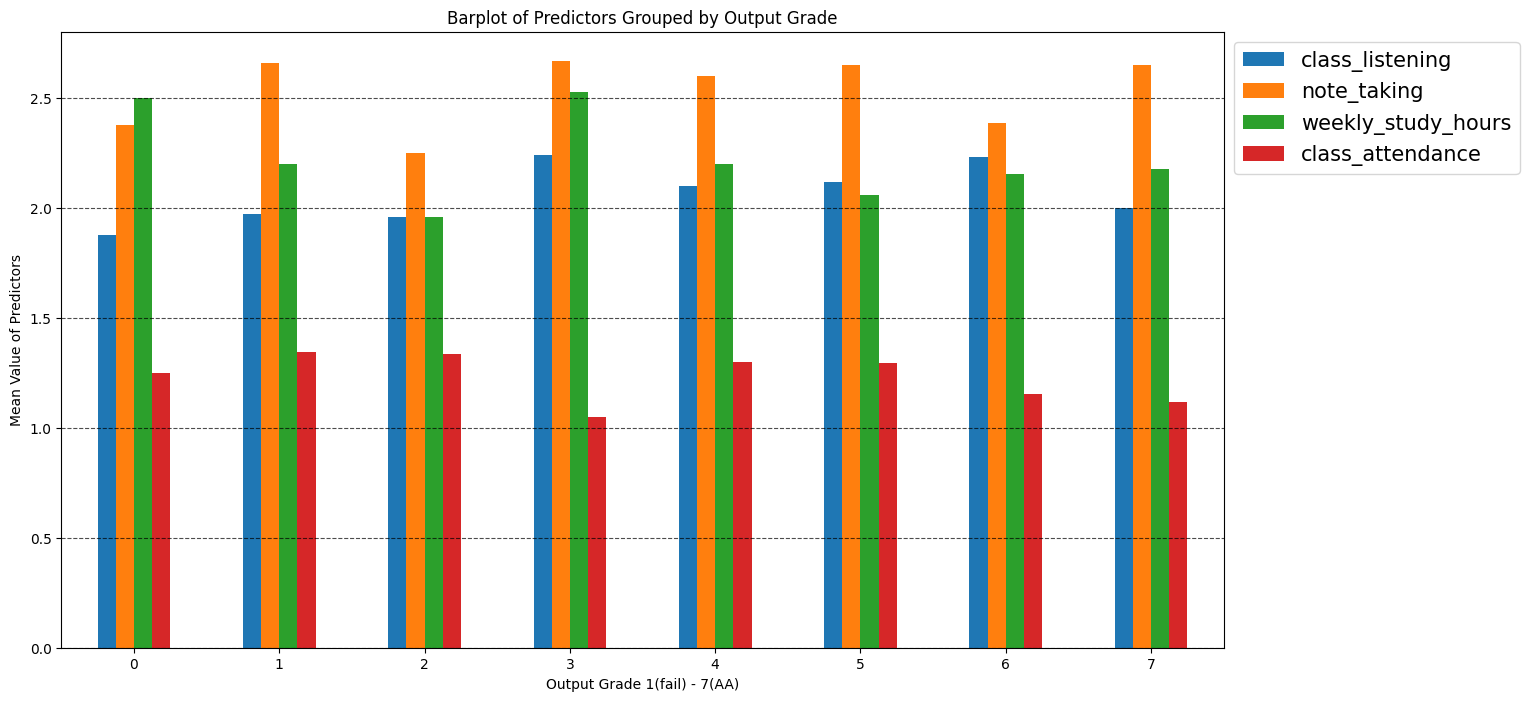

In [ ]:
# Creating in matplotlib
import matplotlib.pyplot as plt

# Creating subset of data with only student actions and output grade
actions = df[["output_grade", "class_listening", "note_taking", "weekly_study_hours", "class_attendance"]]

# Grouping by 'output_grade' and calculating the mean for each predictor
grouped_means = actions.groupby('output_grade').mean()

# Plotting the barplot
grouped_means.plot(kind='bar', figsize=(15, 8))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15) # Creating and placing legend outside of the plot, increasing font size
plt.title('Barplot of Predictors Grouped by Output Grade')
plt.xlabel('Output Grade 0 (fail) - 7 (AA)') # Descriptive X Label
plt.ylabel('Mean Value of Predictors') # Descriptive Y Label
plt.grid(axis='y', linestyle='--', color='black', alpha=0.7) # Adding grid lines for better readability
plt.xticks(rotation=0) # Rotating x-axis labels for better readability
plt.show()



C:\Users\chung\AppData\Local\Temp\ipykernel_23220\390411658.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="output_grade", y="mean_value", hue="predictor", data=df, ci=None)
C:\Users\chung\AppData\Local\Temp\ipykernel_23220\390411658.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


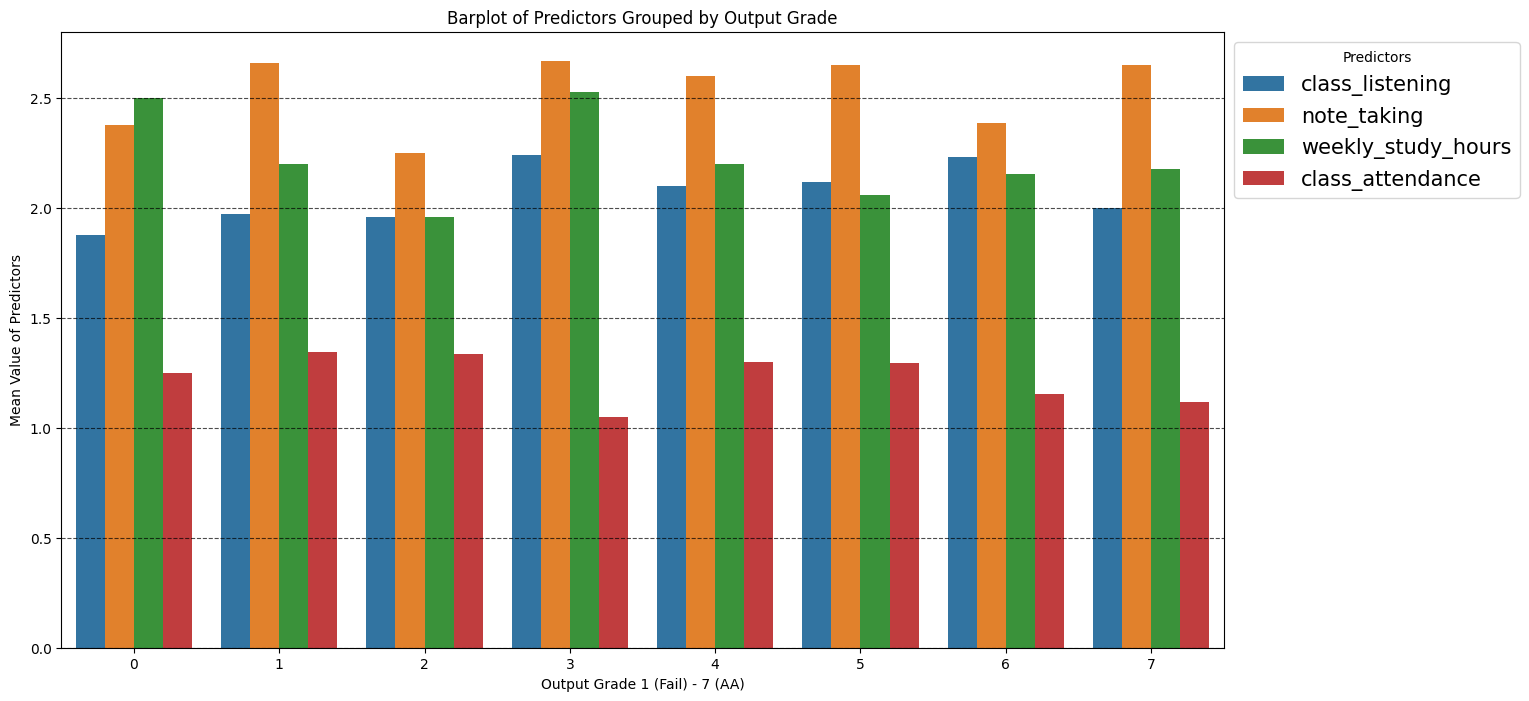

In [ ]:
# Recreating in seaborn
import seaborn as sns

# Melting data for seaborn compatibility
df = pd.DataFrame(actions).melt(id_vars="output_grade", var_name="predictor", value_name="mean_value")

# Creating the barplot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="output_grade", y="mean_value", hue="predictor", data=df, ci=None)

# Placing legend outside of the plot and increasing font size
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=15, title="Predictors")

# Titles and labels
ax.set_title("Barplot of Predictors Grouped by Output Grade")
ax.set_xlabel("Output Grade 0 (Fail) - 7 (AA)")
ax.set_ylabel("Mean Value of Predictors")

# Only including grid lines for the y-axis
ax.grid(axis="y", linestyle="--", color="black", alpha=0.7)


# Rotating x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

The bar plot above represents the mean scores of the action predictors from our dataset. Due to the scoring system we cannot glean any specific infomation from this visialization, however we can discern interesting patterns or find clues as to where to explore further. For example we can see above that there could be a very slight negative correlation with class attendance and grade of the student. In addition we can also say that there could be a slight positive correlation with class_listening and grade.

#### Box plot of familial predictors grouped by output grade

C:\Users\chung\AppData\Local\Temp\ipykernel_23220\2162144584.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  familial.boxplot(by="output_grade", ax=axes,


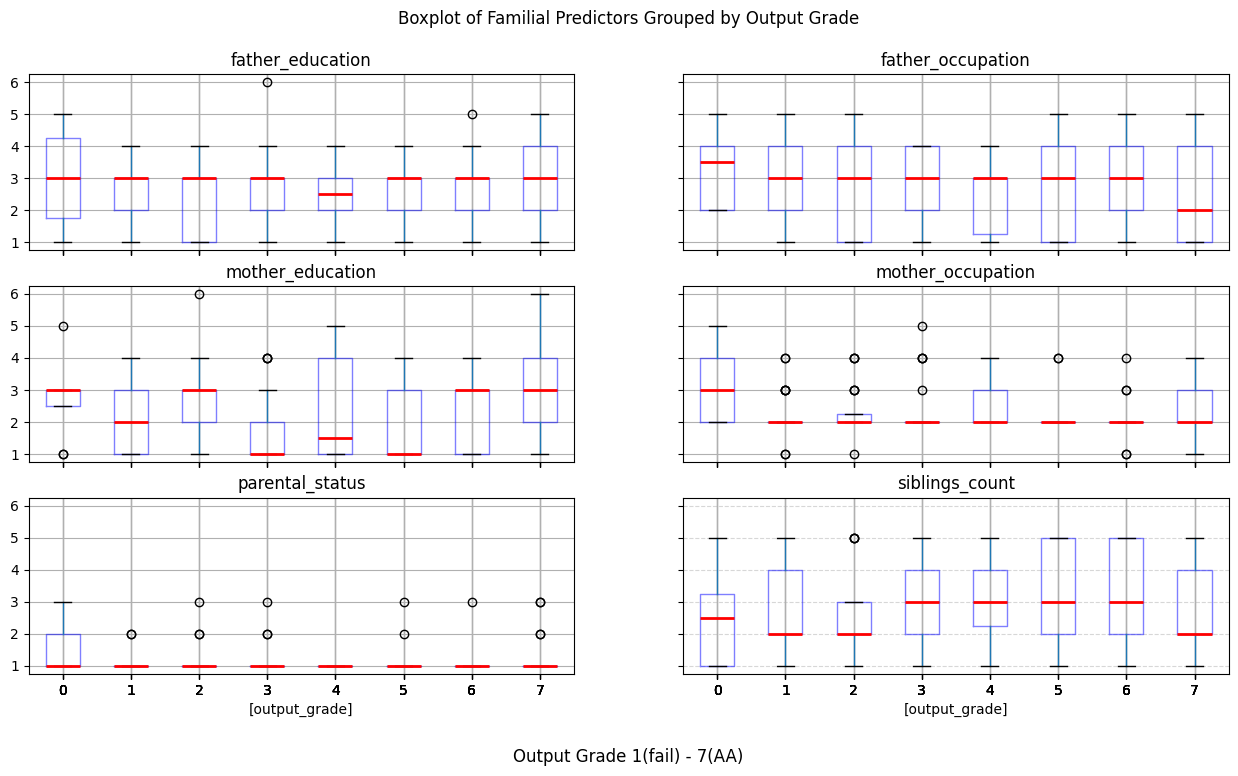

In [ ]:
# Creating subset of data with only familial predictors
familial = df[["output_grade", "mother_education", "father_education", "mother_occupation", "father_occupation", "parental_status", 'siblings_count']]

# Creating boxplot for familial predictors using matplotlib
fig, axes = plt.subplots(figsize=(15, 8))
familial.boxplot(by="output_grade", ax=axes, 
                 medianprops=dict(color="red", linewidth=2),# Customizing median line color and width for readability
                 boxprops=dict(color="blue", alpha=0.5)) # Changing the boxplot color to blue with some transparency

plt.suptitle('Boxplot of Familial Predictors Grouped by Output Grade') # Adding a title for the plot
for spine in axes.spines.values():
    spine.set_visible(False) # Hiding the spines for better data ink ratio

# Setting a single xlabel for the entire figure
plt.gcf().text(0.5, 0.04, 'Output Grade 0 (fail) - 7 (AA)', ha='center', fontsize=12)  # Descriptive X Label

# Removing X tick lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5) 

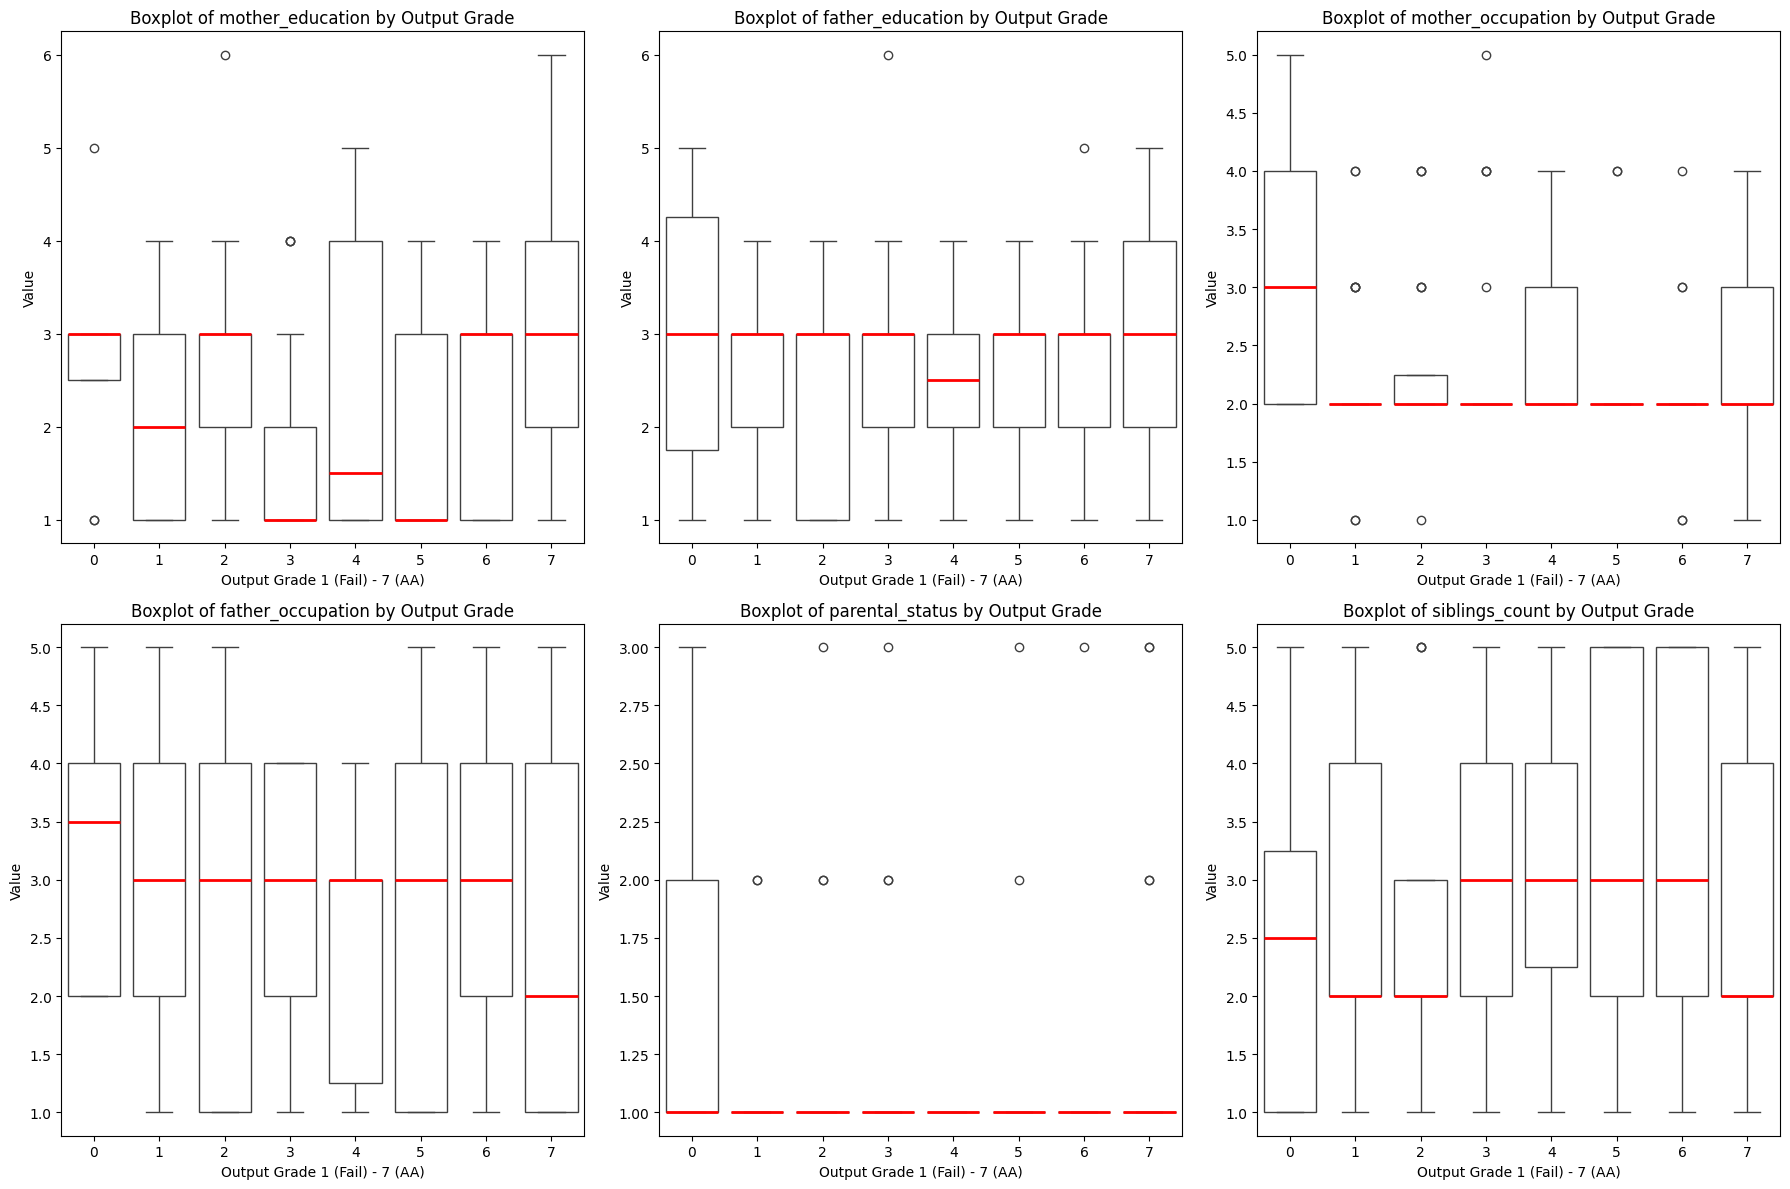

In [ ]:
# Melting data for seaborn compatibility
familial_melted = familial.melt(id_vars=["output_grade"], var_name="predictor", value_name="value")

# Create subplots 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# List of familial predictors
predictors = ["mother_education", "father_education", "mother_occupation",
              "father_occupation", "parental_status", "siblings_count"]

# Loop through predictors and create individual boxplots
for i, predictor in enumerate(predictors):
    row, col = divmod(i, 3)  # Determines subplot position
    sns.boxplot(x="output_grade", y="value", data=familial_melted[familial_melted["predictor"] == predictor], ax=axes[row, col],
                boxprops={"facecolor": "none"},  # Removes boxplot color
                medianprops={"color": "red", "linewidth": 2})  # Emphasizing median line with red and increased width

    # Add titles and labels
    axes[row, col].set_title(f"Boxplot of {predictor} by Output Grade")
    axes[row, col].set_xlabel("Output Grade 0 (Fail) - 7 (AA)")
    axes[row, col].set_ylabel("Value")

# Improve layout
plt.tight_layout()
plt.show()

The box plots above represent the median (red line), IQR (box) and potential outliers for each familial predictor in our data. Again, due to the scoring system we cannot glean specific information from our visualization, however we can note areas for exploration or areas of interest. Above we can see that parental status is a predictor of interest. Referencing the source of the data, for parental status, a 1 signals married, 2 signals divorced, and 3 signals died (one or both); we see variation in parental status for students who have failed their class. The count of sibilings is also of note, a smaller number of siblings seems to lend itself to high academic performance, but also low academic performance, with a peak in the distribution from 3 - 6 output grade.  

#### Differences in creating matplotlib and seaborn plots

The major difference in creating plots with matplotlib and seaborn is the level of intuitiveness in creating the visualizations. For my first visualization, a bar graph with multiple predictors grouped by output grade, seaborn was easy to use. When developing the plot with seaborn, seaborn automatically applies their preloaded suit of features. I can see how this is very helpful in readucing the amount of code and time it takes to produce a visualization. However, in this assignment where I wanted the match the plots as much as I could I found myself taking extra steps to remove certain features, such as the seaborn confidence interval bars which were attached to the bar plot. On the other hand, developing with matplotlib, in my opinion is starting from the bare bones of the visualization and putting each feature in manually. In this way matplotlib may make more logical sense when developing. For my boxplot visual with multiple subplots I found that matplotlib was a bit easier to use in terms of making the fine grain changes I wanted. For example the same issue occured where I seaborn had a preset box facecolor which I removed to match my matplotlib plot. Utilizing seaborn also required a bit more preprocessing, I was required to melt the data in a way to format appropriately for useage.

# Conclusions

After exploring the data what I noticed in the dataset is that there can be many factors that influnce a students academic success. On the student's side what stands out to me as the most possible influence is the ability to and willingness to listen in class. I was suprised to see that weekly study hours and note taking did not have a noticible infludence in success, although the data does not include nuiances such as studying or notetaking effiency. On the familial side of factors, parental status and sibiling count are the two most interesting. These factors may be related to at home distraction, or effects of influence outsides of academia. 

If I were given more time with this data I would run a multiple linear regression to see quantitively which factor or factor combinations have the most influence. 